<a href="https://colab.research.google.com/github/min02yam/R-study/blob/main/%EB%B0%94%EC%9D%B4%EC%98%AC%EB%A6%B0%EC%B0%A8%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [예제]

In [55]:
# Libraries
library(ggplot2)
library(dplyr)
library(forcats)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("gdtools"):
“installation of package ‘gdtools’ had non-zero exit status”

In [64]:
install.packages("gdtools", type = "source")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("gdtools", type = "source"):
“installation of package ‘gdtools’ had non-zero exit status”


In [3]:
install.packages("hrbrthemes")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gdtools’


Warning message in install.packages("hrbrthemes"):
“installation of package ‘gdtools’ had non-zero exit status”
Warning message in install.packages("hrbrthemes"):
“installation of package ‘hrbrthemes’ had non-zero exit status”


In [62]:
library(hrbrthemes) 

ERROR: ignored

In [60]:
install.packages("viridis")
library(viridis)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [56]:
# Load dataset from github
data <- read.table("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/10_OneNumSevCatSubgroupsSevObs.csv", header=T, sep=",") %>%
  mutate(tip = round(tip/total_bill*100, 1))

In [57]:
str(data)

'data.frame':	244 obs. of  7 variables:
 $ total_bill: num  17 10.3 21 23.7 24.6 ...
 $ tip       : num  5.9 16.1 16.7 14 14.7 18.6 22.8 11.6 13 21.9 ...
 $ sex       : chr  "Female" "Male" "Male" "Male" ...
 $ smoker    : chr  "No" "No" "No" "No" ...
 $ day       : chr  "Sun" "Sun" "Sun" "Sun" ...
 $ time      : chr  "Dinner" "Dinner" "Dinner" "Dinner" ...
 $ size      : int  2 3 3 2 4 4 2 4 2 2 ...


In [58]:
table(data$day)  


 Fri  Sat  Sun Thur 
  19   87   76   62 

In [61]:
# Grouped
data %>%
  mutate(day = fct_reorder(day, tip)) %>%
  mutate(day = factor(day, levels=c("Thur", "Fri", "Sat", "Sun"))) %>%
  ggplot(aes(fill=sex, y=tip, x=day)) + #섹스-타겟 팁-연속 데이-범주
    geom_violin(position="dodge", alpha=0.5, outlier.colour="transparent") + #모양
    scale_fill_viridis(discrete=T, name="") + #구분축
    theme_ipsum()  +
    xlab("") +        #x라벨
    ylab("Tip (%)") + #y라벨
    ylim(0,40)

#패키지 설치가 안돼서 그런것같음 

Warning message:
“Ignoring unknown parameters: outlier.colour”


ERROR: ignored

In [ ]:
?fct_reorder

# [예제]

- `fct_reorder()` is useful for 1d displays where the factor is mapped to position; 
- `fct_reorder2()` for 2d displays where the factor is mapped to a non-position aesthetic. 
- `last2() and first2()` are helpers for fct_reorder2(); 
- `last2()` finds the last value of y when sorted by x; 
- `first2()` finds the first value.

1) 함수 적용

In [12]:
df <- tibble::tribble(
  ~color,     ~a, ~b,
  "blue",      1,  2,
  "green",     6,  2,
  "purple",    3,  3,
  "red",       2,  3,
  "yellow",    5,  1
) ; df  # 테이블생성

color,a,b
<chr>,<dbl>,<dbl>
blue,1,2
green,6,2
purple,3,3
red,2,3
yellow,5,1


In [ ]:
df$color <- factor(df$color) #캐릭터->팩터변경

In [13]:
fct_reorder(df$color, df$a, min)

[1] blue   green  purple red    yellow
Levels: blue red purple yellow green

In [31]:
df_2<-fct_reorder2(df$color, df$a, df$b) ; table(df_2)

df_2
purple    red   blue  green yellow 
     1      1      1      1      1 

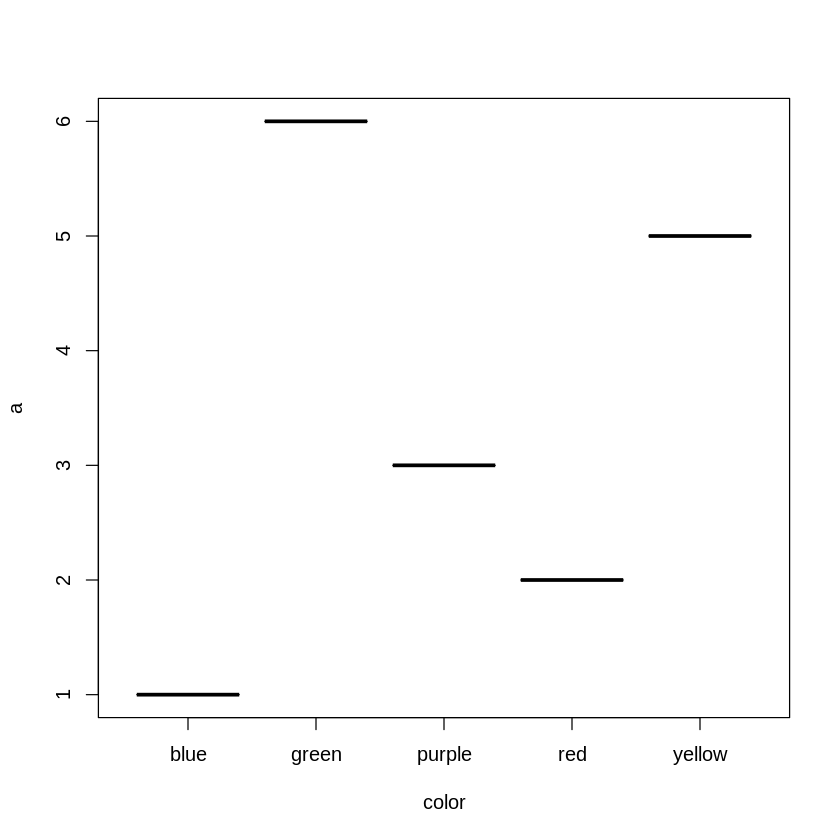

In [33]:
boxplot(a ~ color, data = df)
#boxplot(a ~ color, data = df_2) # 플랏 그릴때는 무조건 안에 함수로 지정 ? 

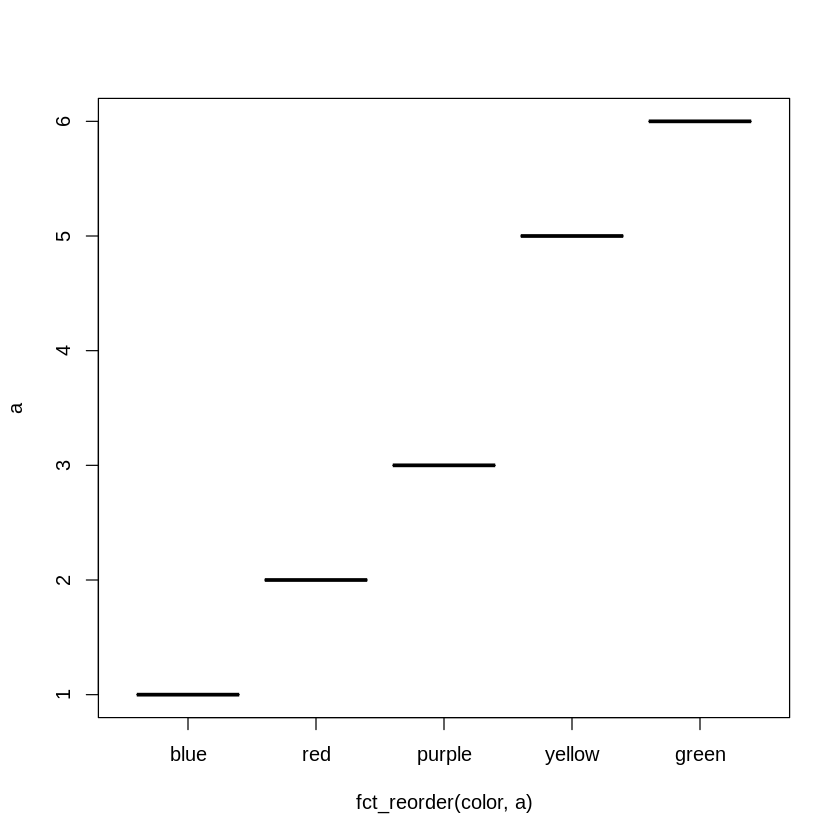

In [36]:
boxplot(a ~ fct_reorder(color, a) ,data = df)

2) iris

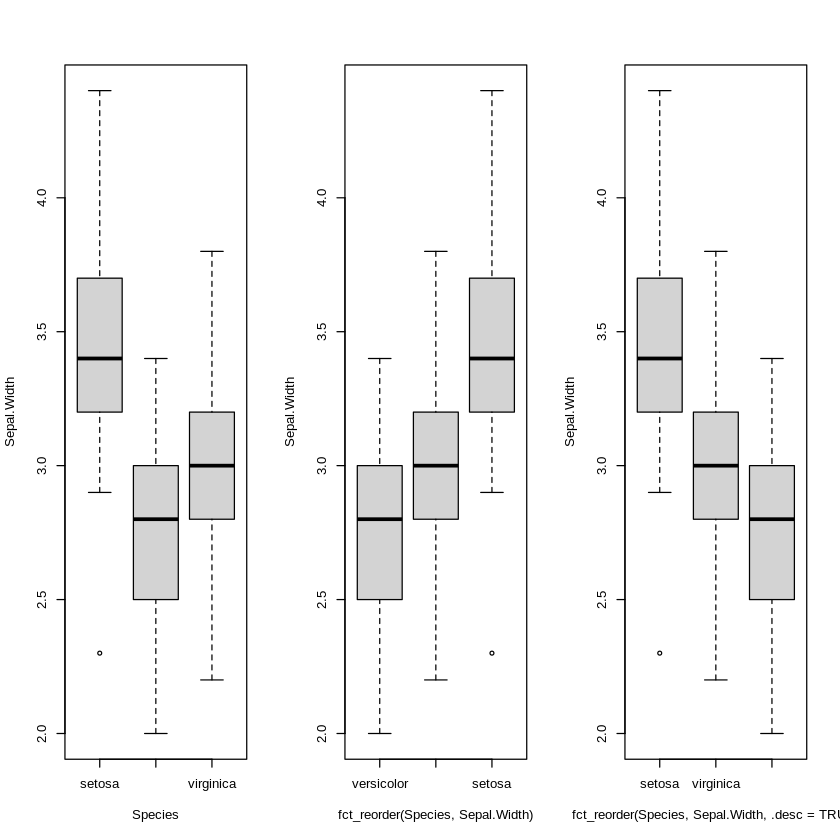

In [25]:
par(mfrow = c(1,3))
boxplot(Sepal.Width ~ Species, data = iris)
boxplot(Sepal.Width ~ fct_reorder(Species, Sepal.Width), data = iris)
boxplot(Sepal.Width ~ fct_reorder(Species, Sepal.Width, .desc = TRUE), data = iris)  # 빈도 순서로 위치 리오더 해주는 거였음 

3) ChickWeight

In [48]:
rm(list=ls())

In [49]:
chks <- subset(ChickWeight, as.integer(Chick) < 10) ; chks %>%tail(5)

,weight,Time,Chick,Diet
,<dbl>,<dbl>,<ord>,<fct>
216,89,14,20,1
217,98,16,20,1
218,107,18,20,1
219,115,20,20,1
220,117,21,20,1


In [ ]:
str(ChickWeight)

In [50]:
chks <- transform(chks, Chick = fct_shuffle(Chick)) ; chks %>%tail(5)

,weight,Time,Chick,Diet
,<dbl>,<dbl>,<ord>,<fct>
216,89,14,20,1
217,98,16,20,1
218,107,18,20,1
219,115,20,20,1
220,117,21,20,1


In [51]:
if (require("ggplot2")) {
ggplot(chks, aes(Time, weight, colour = Chick)) +
  geom_point() +
  geom_line()

ERROR: ignored

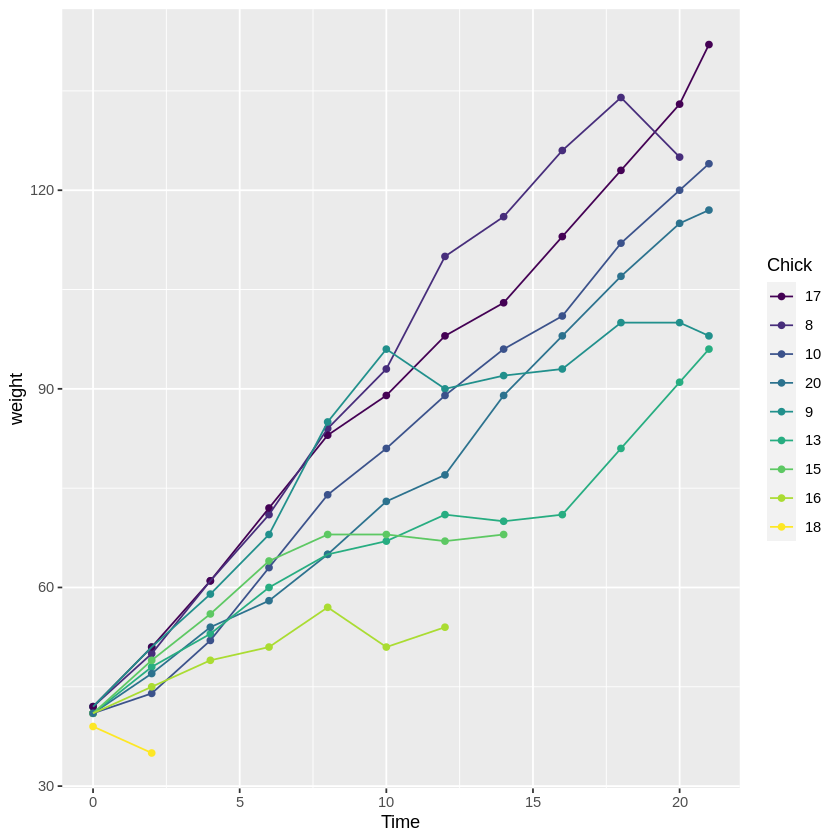

In [52]:
if (require("ggplot2")) {
ggplot(chks, aes(Time, weight, colour = Chick)) +
  geom_point() +
  geom_line()


ggplot(chks, aes(Time, weight, colour = fct_reorder2(Chick, Time, weight))) +
  geom_point() +
  geom_line() +
  labs(colour = "Chick")
}


# 결론
1. 팩터리오더 알게됨
2. RGUI에서는잘돌아감
